# Exploring Dataframes Lab

## Exploring the DataFrame Class in Pandas

### Problem Statement

In this lab, we'll use pandas dataframes to explore the titanic dataset!

### Objectives

* Read in data and store in a pandas dataframe
* Access the head/tail of dataframes to get a feel for the shape of our data
* Access row indexes
* Access column names
* Access descriptive statistics for data stored in a dataframe
* Check for null values (NaNs) in our dataframe
* Plot data using histograms

### Pandas and DataFrames


Dataframes are at the core of the pandas library--they're what makes pandas so powerful for reading, manipulating, and storing data.  Dataframes allow us to couple the power of python programming and scripting with the ease of use and intuitiveness of spreadsheets.  In this lab, we're going to explore some of the basic functionality of the `DataFrame` class in pandas by exploring the _Titanic Dataset_.

**_Run the cell below to import all the necessary libraries for this lab._**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Storing data in DataFrames

Before we begin working with titanic dataset, we'll get started by quickly learning how to create dataframes and populate it with data at instantiation time.  

DataFrames store columns as individual python series.  The way that the data is stored is reminiscent of a python dictionary--the column name acts as the key, while the series of data for that column acts as the value.  We can easily create pandas DataFrames on the fly by passing in a dictionary at instantiation time.  

Running the example code in the cell below to create a sample dataframe.  Then, we access the dataframe stored in `example_df` to show us what the DataFrame contains. By default, Jupyter Notebooks auto-format pandas dataframes and make them look nice and readable--pretty nifty!

In [2]:
example_df = pd.DataFrame({'Column 1': ['a', 'b', 'c'], 'Column 2': [1, 2, 3]})
example_df

,Column 1,Column 2
0,a,1
1,b,2
2,c,3


That was easy! 

Now, we'll have you create your own dataframe.  Create a dictionary called `customer_data` that containst the data in the table below, and then use that dictionary to create a dataframe called `customer_data_df`. **Store all data as strings.**  Once you've created the dataframe, access it to have the jupyter notebook display its contents.  If you did it correctly, it should look identical to the table below.  

|   |   Name   |   Phone  | Zip Code |
|:-:|:--------:|:--------:|:--------:|
| **0** | John Doe | 555-1234 |   94602  |
| **1** | Jane Doe | 555-7864 |   31101  |
| **2** |  Jim Doe | 555-6962 |   34471  |

**_Hint:_** Remember that pandas stores the data column by column, not row by row.  Make sure you format your dictionary correctly! If you get confused, see the example above (example_df).

In [3]:
customer_data = {
    'Name': ['John Doe', 'Jane Doe', 'Jim Doe'],
    'Phone': ['555-1234', '555-7864', '555-6962'],
    'Zip Code': ['94602', '31101', '34471']
}

customer_data_df = pd.DataFrame(customer_data)
customer_data_df

,Name,Phone,Zip Code
0,John Doe,555-1234,94602
1,Jane Doe,555-7864,31101
2,Jim Doe,555-6962,34471


Great job! We'll continue by learning how to read in external data sets stored in .csv files (and other data types) directly into a pandas DataFrame. 

### Reading in Data

One of the handiest pieces of functionality pandas provides is the ability to read in massive data sets with only a single line of code. The pandas library does this by providing a helper function for each of the common files types that typically store data--[read_csv()](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html), [read_excel()](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_excel.html), [read_json()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html), [read_sql()](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_sql.html), and even [read_clipboard()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_clipboard.html), and many others! All of these functions provide simple ways for us to read in datasets and store them in a pandas DataFrame.  

The dataset we'll be working with in this lab is stored in the file `titanic.csv`.  Use the **`read_csv()`**  method and pass in the relative path of the file we'll be reading as a string (the file is stored in the same directory as this jupyter notebook, so the relative path will consist only of the file name).  

Store the dataframe inside of the variable `titanic_df`.  Access it after you've read it in to display the contents, so that we can begin exploring the data we'll be working with.  

**_Hint:_** The `read_csv()` function belongs to the `pandas` library we've imported.  Remember that we have aliased `pandas` to `pd`, so we can access anything stored in pandas using `pd.` and then the name of the function/class/attribute/etc that we want to access.  

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Questions about reading the dataframe

That was easy! A single line of code and we now have a fairly large amount of data stored in a dataframe that is easy to read and work with.  If you've ever had to read in data using vanilla python File I/O--`with open('titanic.csv') as f:`, then you probably realize just how painful of a reading in and **_organizing_** all of this data would be without pandas.  As we'll see when we begin exploring our dataframe, pandas even infers the correct data types for each different column of data as it reads it all in for us!

Scroll up and down and briefly examine the dataframe displayed above, if you haven't already.  Notice that by default, pandas truncates the displayed dataframe, showing us the first 30 and last 30 rows of data, as well as the row indices and column names.  In this case, the number of rows was large enough for pandas to truncate it, but the number of columns was still within the acceptable range where pandas will display all of them. 

If you ever want to change how many rows or columns pandas displays by default before truncating the data, these are parameters you can change manually.  Let's change the number of  rows displayed to 100 so we can see a little bit more of our data.  

The path to the attribute is `pandas` --> `options` --> `display`.  The attributes are fittingly named `max_columns` and `max_rows`.

For instance, if we wanted to change the maximum number of columns displayed to 40, we would type:

```python
pd.options.display.max_columns = 40
```

In the cell below, change the maximum number of rows displayed to 100. Then, display `titanic_df` again.

In [5]:
pd.options.display.max_rows = 100
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


You'll notice the dataframe now displays the first and last 50 rows by default, as opposed to the first and last 30 as it did before. Changing this setting is handy when you have a dataset that is small enough that you want to feasibly look at the entire thing, but large enough that pandas truncates it by default.  

A word of warning--displaying datasets that are too large will take a very long time, and bring your computer to a screeching halt.  Next time you're working with a dataset that has 10000 rows and 100 columns, resist the urge to display the whole thing! 

Before moving on, it's worth pointing out that whenever you display at a dataframe, pandas shows you the dimensions of the dataframe at the bottom of the print out.  This is very handy for knowing the size of the data you're working with.  This particular dataframe uses integers as row indices, but as you work with different datasets, this won't always be the case (for example, time series data often uses time stamps as indices instead of numbers).  

Scroll to the bottom of the dataframe, and examine the **_dimensionality_** of this dataset.  How many rows does it have? How many columns?

Set the value of the variables in the next cell equal to the respective values, as integers. If the dataframe had 50 rows, you would set `number_of_rows = 50`.

In [6]:
number_of_rows = 891
number_of_columns = 12

### Head and Tail

There are a lot of things we can do to explore a new data set, but the first step is always the same--getting a feel for what our data set actually contains.  We don't need to see the entire dataset to do this--just a couple rows will do.  Luckily, pandas makes this easy, by allowing us to print out the **_head_** or **_tail_** of the dataframe--the first 5 or last 5 rows, respectively.  

In the cell below, call `titanic_df`'s `.head()` method, and then the `.tail()` method.  

In [7]:
titanic_df.head()
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Notice that the jupyter notebook only displayed the tail, because it was the last variable accessed.  Jupyter notebooks only display one thing at a time. What about if we wrap `titanic_df.head()` in a print statement, and then call `titanic_df.tail()`?

Try it in the cell below and see what happens.

In [8]:
print(titanic_df.head())
titanic_df.tail()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Well, that kind of worked.  The print statement displayed the head of the dataframe, showing us the first 5 rows, along with all of the column names and the values that each row contains for that column.  However, it didn't format it to look nice like the `.tail()` call did. 

That's because the `print()` call displayed the raw text returned by `titanic_df.head()`.  By default, the jupyter notebook takes the last thing accessed and calls `display()` on it, which formats it and generally makes it pretty, as we've seen above.  When we access a variable by just typing its name, the jupyter notebook calls `display()` behind the scenes--calling a cell that has `titanic_df.tail()` as the last thing accessed directly actually translates to `display(titanic_df.tail())` behind the scenes.

If we want to display multiple dataframes in the same cell output, it's easy--we just need to wrap all but the last things we want displayed in `display()` functions.  

In the cell below, display `titanic_df`, as well as `titanic_df.head()` and `titanic_df.tail()`. Remember that as a convention of jupyter notebooks, you don't need to actually call `display()` on the last one.

In [9]:
display(titanic_df)
display(titanic_df.head())
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Great! If you did this correctly, you should see the (truncated) dataframe contained within `titanic_df`, as well as the `head` and `tail`, and all should be formatted nicely thanks to our handy jupyter notebook.

### Exploring Columns and Rows

Another great thing about DataFrames is just how easy it is to access the data we need.  The syntax for grabbing rows and columns is just like the slicing syntax for lists in vanilla python. 

If we want to access a column, all we need to do is pass in the column name inside square brackets.  \

For instance, if we wanted to get the names of all the passengers in our dataset, we can just pass in the column name like so:

```python
passenger_names = titanic_df['Name']
```

In the cell below, store the values for the `Survived` column inside `survived_data`, as well as the data for `Age` inside `age_data`. Display the `head` for both.

In [10]:
survived_data = titanic_df['Survived']
age_data = titanic_df['Age']
display(survived_data.head())
age_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

If you're wondering why these weren't displayed in the same way as the dataframes above, it's because they are pandas `Series` objects.  Pandas only formats `DataFrames` as html tables to make them readable.  

Accessing columnar data is easy, since all we have to do is pass the column names. But what if our dataset has too many columns, and the list is truncated?  Not a problem--there's an easy way to see all of the columns names.  All column names are stored within the dataframe's `.columns` attribute.  We can just access it to get a full list of all the column names.

Access the column names of `titanic_df` in the cell below. 

In [11]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We'll spend an entire lab going over all the ways to access row and column data in the future, but for now, let's make sure we're comfortable accessing rows of data in the same way.  The easiest way to access rows is to pass in a range of rows for what you want, just as if we were slicing a python list.  

For instance, if we wanted to get rows 5-10, we can just type:

```python
rows_5_to_10 = titanic_df[5:10]
```

This would return rows 5, 6, 7, 8, and 9 from the dataframe--remember that in python, the slicing operator is **_inclusive_** to the position at the start of the range, but **_exclusive_** to position at the end, meaning that it contains the value at the index listed as the start, and everything up to--but not including--the index at the end.  

In the cell below, slice rows 10-20 (including row 20) and store it in the variable `rows_10_to_20`. Display the contents of this variable to confirm that you have all the rows we're looking for.  

In [12]:
rows_10_to_20 = titanic_df[10:21]
rows_10_to_20

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


### Descriptive Statistics for our DataFrame

Another common way to explore a new dataset is to take a look at the descriptive statistics to get quick feel for everything.  This is a common operation in Data Science, so pandas has provided a quick way to access descriptive statistics.  For any pandas Dataframe (or Series!), all we need to do is call the `.describe()` method to see the summary statistics for the data it contains. 

In the cell below, call the `titanic_df`'s `.describe()` method. 

In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


That was easy! With a quick method call, we can now see some very important and/or informative details about our dataset, such as:

1. The `Age` column doesn't have the same count as the length of our dataframe, meaning it contains null values we'll need to deal with.  
1. The average ticket price was around \$32, and the median price is around \$14.
1. The cheapest ticket was free, and the most expensive ticket was \$512.
1. The average passenger age was around 14, and the median age is 28.

These summary statistics are useful because they show us issues in our dataset we'll need to deal with (e.g. the null values in the age column), as well as suggesting possible things worth investigating further (e.g. the difference between the average and median fare suggests that the data is not normally distributed, or contains outliers).

You may have noticed that although our dataframe contains 12 columns, the summary statistics only contains information on 7 of them.  That's because the 5 columns it excluded contain data that is non-numeric--that is, the data is encoded as strings. This makes sense--it's one thing to calculate summary statistics such as the average age or fare, but it's impossible to calculate something like the average name, so pandas skips that column completely. 

### Checking for Null Values

It's always important to make sure that we detect and deal with any null values in our dataset.  Even in a dataset of a billion items, one null value will bring most models to a screeching halt.  

Pandas has several ways of dealing with null values--let's start by checking to see which columns contain null values, and how many. DataFrames have a helpful method called `isna()`.  Call `titanic_df.isna()` in the cell below.

In [19]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


The output might look weird, but there's a method to this madness.  `isna()` returns a dataframe of the exact same size and shape as the original dataframe, but containing only boolean values.  Anywhere there is a null value, that cell contains a `True`, while every cell that is not null contains a `False`.  On it's own, this matrix isn't very helpful--it's not easy to read, and is probably harder to read than just looking through the real dataframe for null values.  However, this method becomes very useful when we chain it with other method calls.  

For instance, if we wanted to see which rows contain null values, we just need to call `titanic_df.isna().any()`.  Call this in the cell below.

In [21]:
titanic_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

This is pretty useful--we can see that the `Age`, `Cabin`, and `Embarked` all contain null values. However, this doesn't tell us **_how many_** null values there are. Luckily, we can take advantage of the boolean format of the data returned in the `isna()` matrix.  In programming, `True` has a value of `1`, and `False` has a value of `0`.  So if we take the sum of each column, we'll have a count of the total number of null values contained within each.

In the cell below, call `titanic_df.isna().sum()`.

In [23]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ah, there we go.  We can see from the output above that `Embarked` has 2 null values, `Age` has 177, and `Cabin` has a whopping 687.  There are many ways to deal with null values.  If the only null values in the dataset were the 2 in the `Embarked` column, the easiest solution would probably be to just drop the rows containing null values by calling `titanic_df.dropna()`.  However, in it's current format, this is a _bad idea_, because we would dropping at least 687 rows, and possibly more, in a dataset that only contains 891.  

Don't worry if you're not quite sure how you would deal with these null values yet--we'll cover this in depth in a future lab.  The goal of this section was just to get a handle on how to check for null values, not how to deal with them.

### Plotting our Data

The last thing we'll do for this lab is to plot some of our data.  Pandas makes this very easy, because it contains a wrapper around the popular graphing library **_matplotlib_**.  A common use case for plotting our data is to see the distribution of data for a column or columns.  For instance, if we wanted to plot the total number of passengers in 1st, 2nd, and 3rd class, which is stored in the `Pclass` attribute. 

We can do this by slicing that column, and then calling `.plot()`. There are many types of plots that we can access, and pandas isn't usually great at guessing which type, so we need to tell it which kind of plot we want.  We want to plot this as a histogram, so we'll need to pass `kind='hist'` inside of the `.plot()` call.  

In the cell below, plot a histogram of the `Pclass` column.

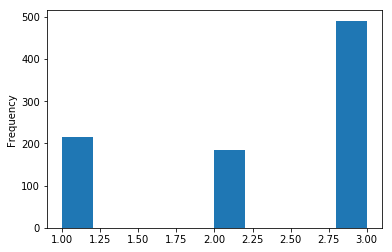

In [14]:
titanic_df['Pclass'].plot(kind='hist')

Nice! that wasn't so hard.  Histograms are very useful for seeing the distribution of values, and they work very well with ordinal data such as `Pclass`, where people are either of class 1, 2, or 3. However, if we want to visualize the `Age` column as a histogram, we'll need to bin it.  Otherwise, we'll see a bar for every single year contained within the dataframe, which isn't useful and will make it hard to read.  

Let's divide the passengers into equal bins of 10 year increments.  Since we already printed out the summary statistics, we can see that the oldest passenger on the ship was 80.  that means that we need to set the optional parameter `bins` equal to `8` inside the `.plot()` call.  We'll also need to tell it that `kind='hist'`, as we did before. 

If we want to show multiple graphs in the same cell output, we run into the same problem as we did displaying mutliple dataframes.  The solution here is slightly different, since we're working with matplotlib.  To display more than one graph in a cell output, just call `plt.show()` after every graph but the last one in the cell. 

In the cell below, display a histogram with 8 bins for the `Age` column, and a histogram with 10 bins for the `Fare` column.  

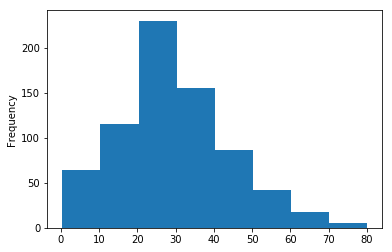

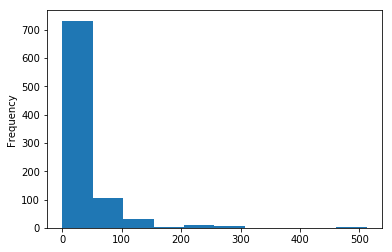

In [15]:
titanic_df['Age'].plot(kind='hist', bins=8)
plt.show()
titanic_df['Fare'].plot(kind='hist', bins=10)

Great! Take a look at these graphics--what do they tell us about this dataset?  Based on the summary statistics we printed out earlier, is this what you expected them to look like?

# Conclusion

In this lab, we got familiar with the pandas `DataFrame` class.  We learned how to:

* Create DataFrames from Scratch
* Read in data from external files and store it in a DataFrame
* Display a full dataframe, as well as the head or the tail
* View a full list of column names for a dataframe, as well as access columns and rows
* Checked for null values
* Get descriptive statistics on our DataFrame
* Plot data from our DataFrame as a histogram, binned or unbinned